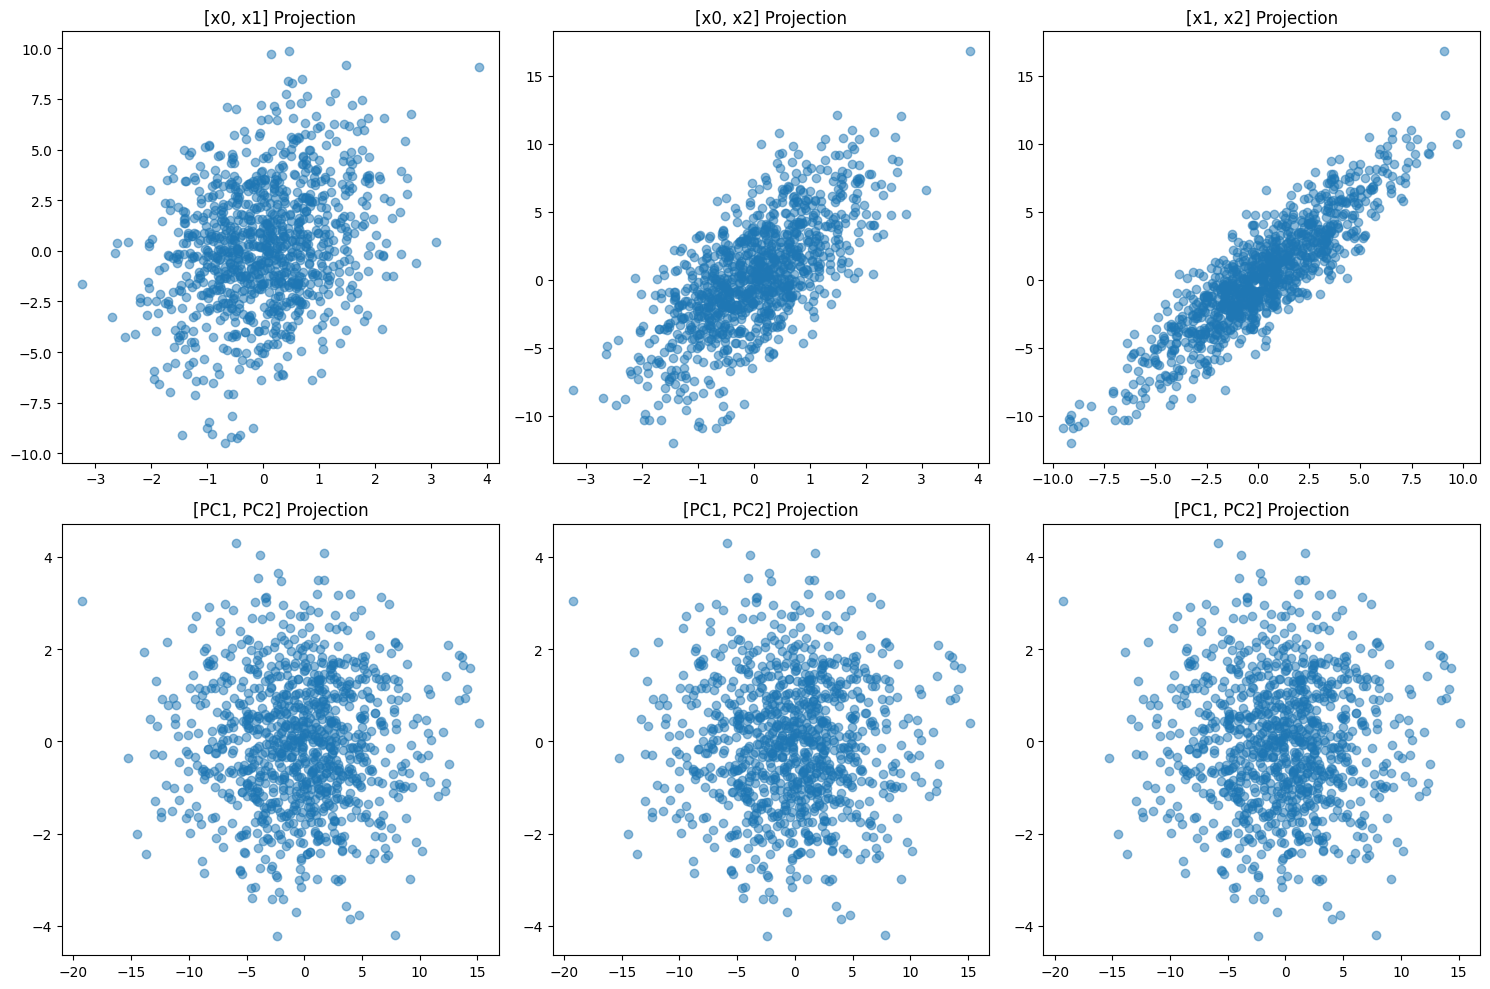

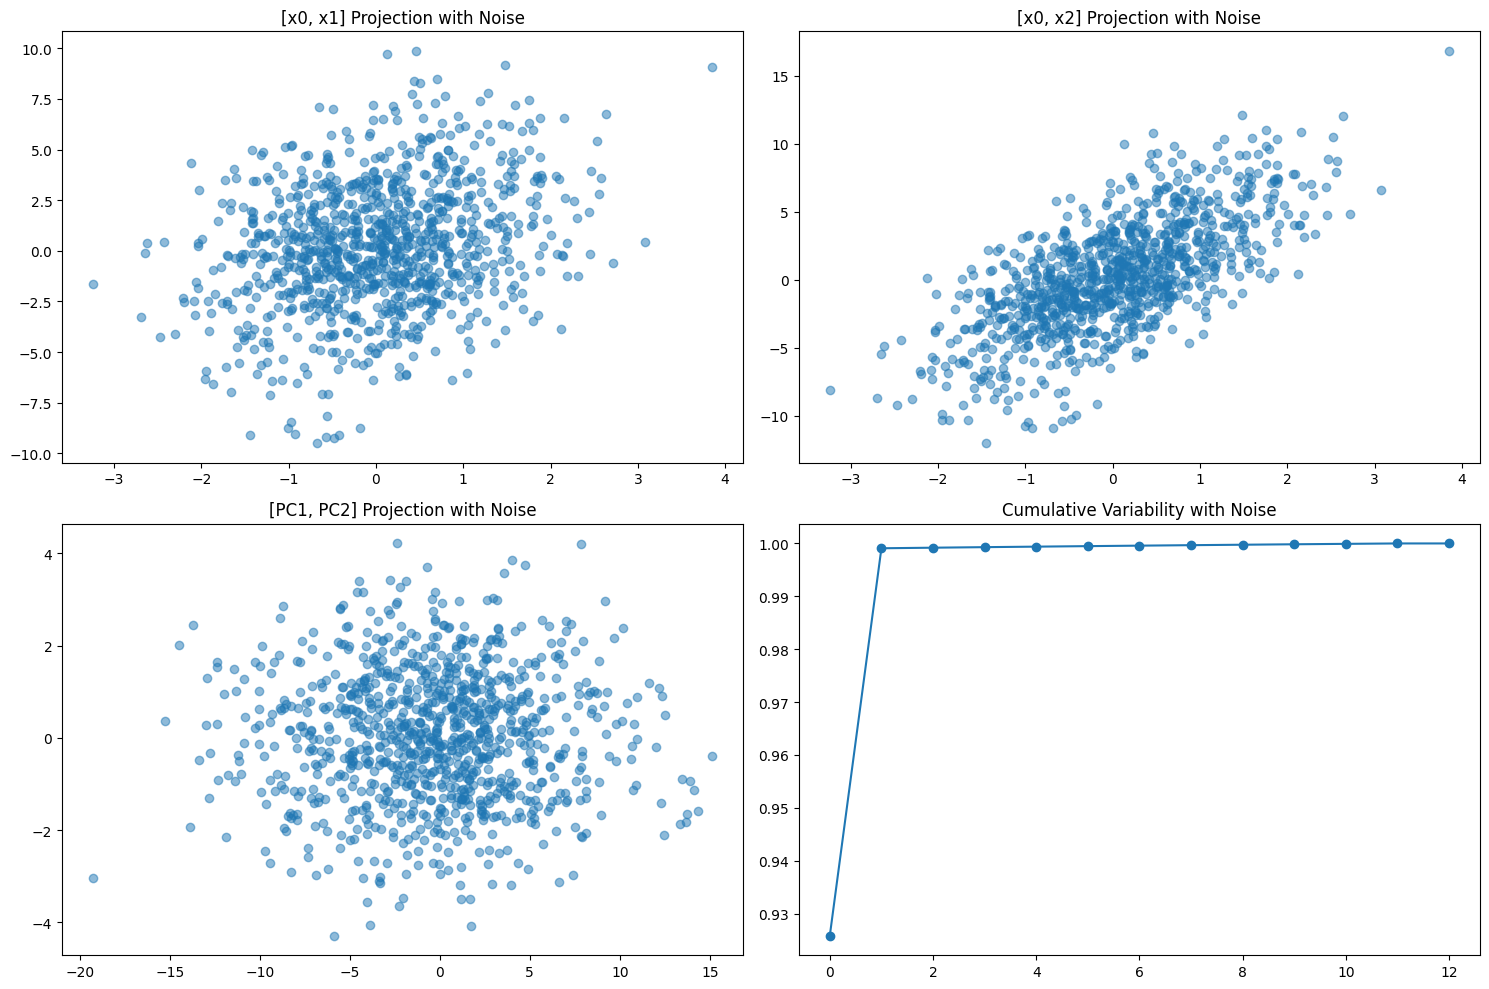

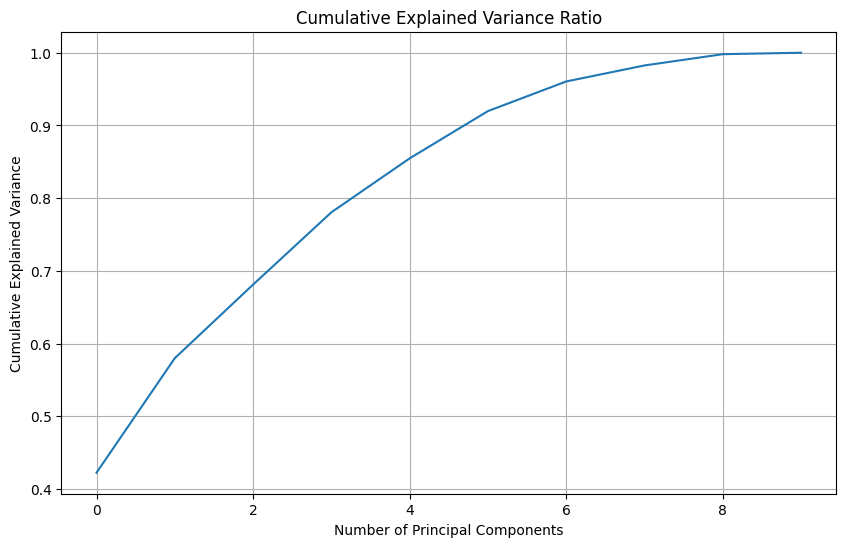

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. PCA on 3D dataset
np.random.seed(42)
N = 1000
x1 = np.random.normal(0, 1, N)
x2 = x1 + np.random.normal(0, 3, N)
x3 = 2 * x1 + x2

data = np.column_stack((x1, x2, x3))

cov_matrix = np.cov(data, rowvar=False)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
u, s, vh = np.linalg.svd(data, full_matrices=False)
eigenvectors_svd = vh.T
explained_var_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_var_ratio = np.cumsum(explained_var_ratio)
num_components = np.argmax(cumulative_var_ratio >= 0.99) + 1
reduced_data = np.dot(data, eigenvectors[:, :num_components])
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].scatter(data[:, 0], data[:, 1], alpha=0.5)
axes[0, 0].set_title('[x0, x1] Projection')

axes[0, 1].scatter(data[:, 0], data[:, 2], alpha=0.5)
axes[0, 1].set_title('[x0, x2] Projection')

axes[0, 2].scatter(data[:, 1], data[:, 2], alpha=0.5)
axes[0, 2].set_title('[x1, x2] Projection')

axes[1, 0].scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
axes[1, 0].set_title('[PC1, PC2] Projection')

axes[1, 1].scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
axes[1, 1].set_title('[PC1, PC2] Projection')

axes[1, 2].scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
axes[1, 2].set_title('[PC1, PC2] Projection')

plt.tight_layout()
plt.show()


# 2. PCA on a nD dataset

np.random.seed(42)
def generate_dataset_with_noise(N, noise_factor=20):
    x1 = np.random.normal(0, 1, N)
    x2 = x1 + np.random.normal(0, 3, N)
    x3 = 2 * x1 + x2

    noise = np.random.normal(0, 1/noise_factor, size=(N, 10))
    data = np.column_stack((x1, x2, x3, noise))
    return data

N = 1000
data_with_noise = generate_dataset_with_noise(N)

cov_matrix_with_noise = np.cov(data_with_noise, rowvar=False)
eigenvalues_with_noise, eigenvectors_with_noise = np.linalg.eig(cov_matrix_with_noise)
sorted_indices_with_noise = np.argsort(eigenvalues_with_noise)[::-1]
eigenvalues_with_noise = eigenvalues_with_noise[sorted_indices_with_noise]
eigenvectors_with_noise = eigenvectors_with_noise[:, sorted_indices_with_noise]
explained_var_ratio_with_noise = eigenvalues_with_noise / np.sum(eigenvalues_with_noise)
cumulative_var_ratio_with_noise = np.cumsum(explained_var_ratio_with_noise)
num_components_with_noise = np.argmax(cumulative_var_ratio_with_noise >= 0.99) + 1

reduced_data_with_noise = np.dot(data_with_noise, eigenvectors_with_noise[:, :num_components_with_noise])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].scatter(data_with_noise[:, 0], data_with_noise[:, 1], alpha=0.5)
axes[0, 0].set_title('[x0, x1] Projection with Noise')
axes[0, 1].scatter(data_with_noise[:, 0], data_with_noise[:, 2], alpha=0.5)
axes[0, 1].set_title('[x0, x2] Projection with Noise')
axes[1, 0].scatter(reduced_data_with_noise[:, 0], reduced_data_with_noise[:, 1], alpha=0.5)
axes[1, 0].set_title('[PC1, PC2] Projection with Noise')
axes[1, 1].plot(cumulative_var_ratio_with_noise, marker='o')
axes[1, 1].set_title('Cumulative Variability with Noise')

plt.tight_layout()
plt.show()


# 3. Optional: PCA on the MAGIC dataset

file_path = './data/magic04.data'
column_names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv(file_path, names=column_names)
X = df.iloc[:, :-1].values
X_standardized = (X - X.mean(axis=0)) / X.std(axis=0)
pca = PCA()
principal_components = pca.fit_transform(X_standardized)
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()